In [412]:
import matplotlib.pyplot as plt
from dataclasses import dataclass
from enum import Enum
from typing import List
import math
from scipy.stats import linregress
import numpy as np
from statsmodels.stats.multitest import multipletests
import pandas as pd
from scipy.stats import ttest_rel

# Эксперимент 1

Оценим, как влияет плотность графа на скорость работы SuiteSparse:GraphBlas

In [413]:
class Experiment1Percent(Enum):
    ONE = 1
    THREE = 3
    FIVE = 5
    SEVEN = 7
    TEN = 10
    THIRTEEN = 13
    FIFTEEN = 15

@dataclass
class Experiment1Data:
    removed_percent: Experiment1Percent
    mean: float
    std_dev: float
    confidence_interval: float

@dataclass
class Experiment1GraphData:
    nodes_count: int
    edges_count: int
    experiment: List[Experiment1Data]

In [414]:
CAL = [
    Experiment1Data(Experiment1Percent.ONE, 26.466057, 0.837812, 0.164211),
    Experiment1Data(Experiment1Percent.THREE, 26.498344, 1.024860, 0.200873),
    Experiment1Data(Experiment1Percent.FIVE, 27.391175, 0.675689, 0.132435),
    Experiment1Data(Experiment1Percent.SEVEN, 28.170295, 1.369240, 0.268371),
    Experiment1Data(Experiment1Percent.TEN, 26.387428, 0.827761, 0.162241),
    Experiment1Data(Experiment1Percent.THIRTEEN, 26.625265, 0.802797, 0.157348),
    Experiment1Data(Experiment1Percent.FIFTEEN, 27.093682, 0.696141, 0.136444),
]

LKS = [
    Experiment1Data(Experiment1Percent.ONE, 38.566431, 2.221782, 0.235469),
    Experiment1Data(Experiment1Percent.THREE, 38.999161, 1.032876, 0.202444),
    Experiment1Data(Experiment1Percent.FIVE, 37.764650, 1.205572, 0.236292),
    Experiment1Data(Experiment1Percent.SEVEN, 37.221832, 0.972146, 0.190541),
    Experiment1Data(Experiment1Percent.TEN, 38.176420, 1.149621, 0.225326),
    Experiment1Data(Experiment1Percent.THIRTEEN, 38.022250, 1.074143, 0.210532),
    Experiment1Data(Experiment1Percent.FIFTEEN, 41.723641, 1.345632, 0.263744),
]

FLA = [
    Experiment1Data(Experiment1Percent.ONE, 24.105686, 2.517939, 0.293516),
    Experiment1Data(Experiment1Percent.THREE, 21.830450, 2.767439, 0.242418),
    Experiment1Data(Experiment1Percent.FIVE, 22.300718, 2.266165, 0.244168),
    Experiment1Data(Experiment1Percent.SEVEN, 22.356389, 2.493316, 0.288690),
    Experiment1Data(Experiment1Percent.TEN, 22.204330, 2.111474, 0.213849),
    Experiment1Data(Experiment1Percent.THIRTEEN, 23.493150, 2.765320, 0.242003),
    Experiment1Data(Experiment1Percent.FIFTEEN, 23.326089, 2.371614, 0.264836),
]

COL = [
    Experiment1Data(Experiment1Percent.ONE, 3.814088, 0.336348, 0.065924),
    Experiment1Data(Experiment1Percent.THREE, 3.748344, 0.379235, 0.074330),
    Experiment1Data(Experiment1Percent.FIVE, 3.739790, 0.327712, 0.064231),
    Experiment1Data(Experiment1Percent.SEVEN, 3.849724, 0.259425, 0.050847),
    Experiment1Data(Experiment1Percent.TEN, 3.808096, 0.333769, 0.065419),
    Experiment1Data(Experiment1Percent.THIRTEEN, 3.714212, 0.356262, 0.069827),
    Experiment1Data(Experiment1Percent.FIFTEEN, 3.743591, 0.317745, 0.062278),
]

NW = [
    Experiment1Data(Experiment1Percent.ONE, 22.347572, 1.933922, 0.279049),
    Experiment1Data(Experiment1Percent.THREE, 24.011724, 1.700655, 0.233328),
    Experiment1Data(Experiment1Percent.FIVE, 22.025218, 2.549457, 0.299694),
    Experiment1Data(Experiment1Percent.SEVEN, 22.020217, 2.335696, 0.257796),
    Experiment1Data(Experiment1Percent.TEN, 23.047652, 2.098144, 0.211236),
    Experiment1Data(Experiment1Percent.THIRTEEN, 23.664251, 2.385332, 0.167525),
    Experiment1Data(Experiment1Percent.FIFTEEN, 23.580723, 1.949884, 0.282177),
]

NY = [
    Experiment1Data(Experiment1Percent.ONE, 2.993697, 0.315580, 0.061854),
    Experiment1Data(Experiment1Percent.THREE, 2.985031, 0.368902, 0.072305),
    Experiment1Data(Experiment1Percent.FIVE, 2.967114, 0.311455, 0.061045),
    Experiment1Data(Experiment1Percent.SEVEN, 2.906818, 0.334033, 0.065470),
    Experiment1Data(Experiment1Percent.TEN, 2.560480, 0.319258, 0.062575),
    Experiment1Data(Experiment1Percent.THIRTEEN, 2.548767, 0.341441, 0.066923),
    Experiment1Data(Experiment1Percent.FIFTEEN, 2.673835, 0.419422, 0.082207),
]

NE = [
    Experiment1Data(Experiment1Percent.ONE, 22.370445, 1.144322, 0.224287),
    Experiment1Data(Experiment1Percent.THREE, 23.871507, 1.116066, 0.218749),
    Experiment1Data(Experiment1Percent.FIVE, 22.687512, 1.154947, 0.226370),
    Experiment1Data(Experiment1Percent.SEVEN, 23.888014, 1.198645, 0.234934),
    Experiment1Data(Experiment1Percent.TEN, 22.324429, 1.136016, 0.222659),
    Experiment1Data(Experiment1Percent.THIRTEEN, 22.634136, 1.064606, 0.208663),
    Experiment1Data(Experiment1Percent.FIFTEEN, 23.989808, 1.261229, 0.247201),
]

BAY = [
    Experiment1Data(Experiment1Percent.ONE, 2.861062, 0.334525, 0.065567),
    Experiment1Data(Experiment1Percent.THREE, 3.004279, 0.349781, 0.068557),
    Experiment1Data(Experiment1Percent.FIVE, 3.035986, 0.302589, 0.059307),
    Experiment1Data(Experiment1Percent.SEVEN, 2.924317, 0.296553, 0.058124),
    Experiment1Data(Experiment1Percent.TEN, 2.959883, 0.358537, 0.070273),
    Experiment1Data(Experiment1Percent.THIRTEEN, 2.948033, 0.383634, 0.075192),
    Experiment1Data(Experiment1Percent.FIFTEEN, 3.015746, 0.296898, 0.058192),
]

In [415]:
GRAPHS = {
    "California and Nevada": Experiment1GraphData(1_890_815, 4_657_742, CAL),
    "Great Lakes": Experiment1GraphData(2_758_119, 6_885_658, LKS),
    "Northwest USA": Experiment1GraphData(1_207_945, 2_840_208, NW),
    "Northeast USA": Experiment1GraphData(1_524_453, 3_897_636, NE),
    "Florida": Experiment1GraphData(1_070_376, 2_712_798, FLA),
    "San Francisco Bay Area": Experiment1GraphData(321_270, 800_172, BAY),
    "New York City": Experiment1GraphData(264_346, 733_846, NY),
    "Colorado": Experiment1GraphData(435_666, 1_057_066, COL),
}

R_VALUES = []
P_VALUES = []
NAMES = []

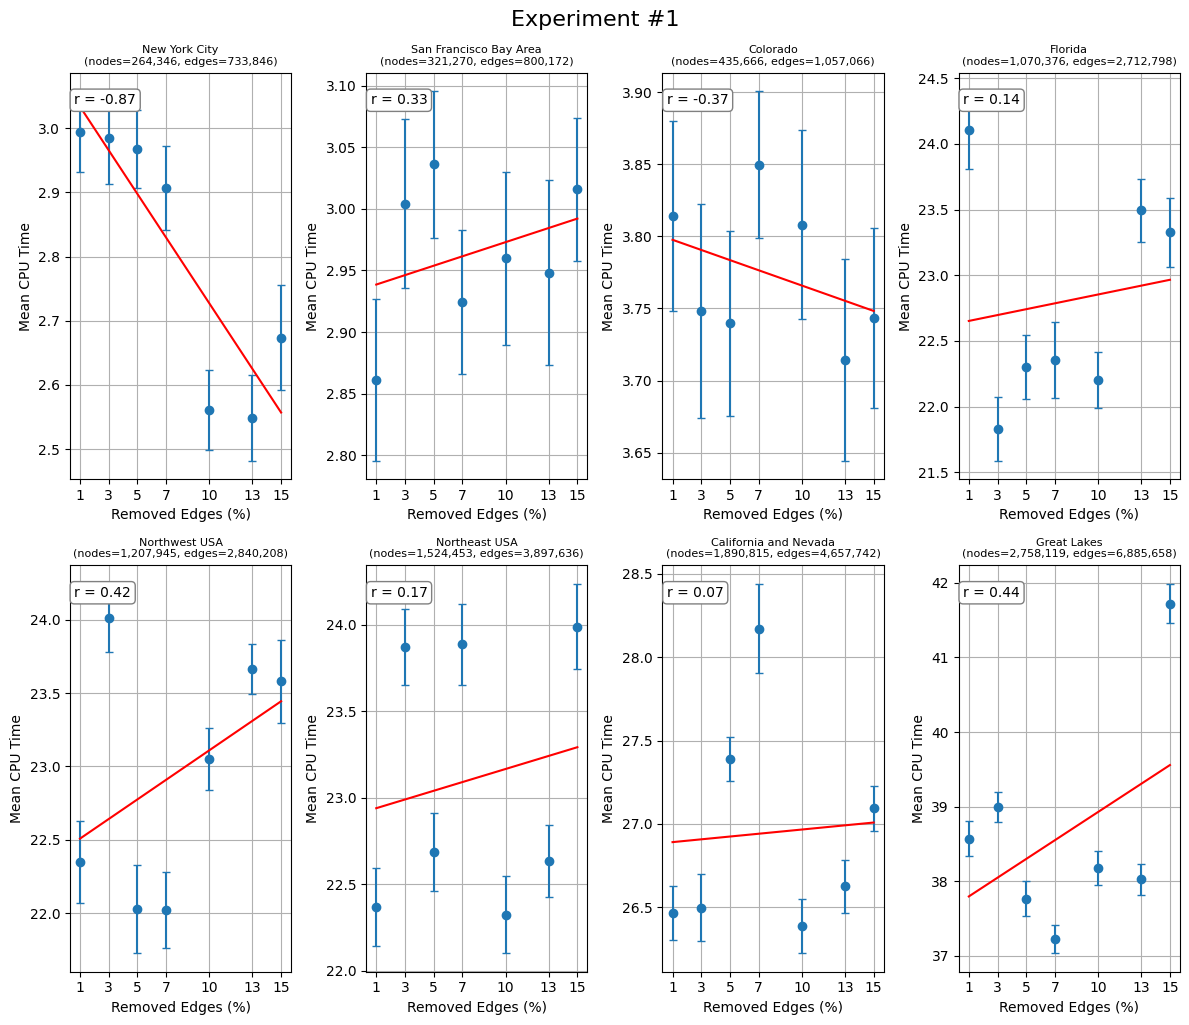

In [416]:
num_graphs = len(GRAPHS)
cols = 4
rows = math.ceil(num_graphs / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

sorted_graphs = sorted(GRAPHS.items(), key=lambda g: g[1].nodes_count)

for idx, (name, graph_data) in enumerate(sorted_graphs):
    ax = axes[idx]
    x = [d.removed_percent.value for d in graph_data.experiment]
    y = [d.mean for d in graph_data.experiment]
    yerr = [d.confidence_interval for d in graph_data.experiment]

    ax.errorbar(x, y, yerr=yerr, fmt='o', capsize=3, label=name, color='tab:blue')
    ax.set_title(f"{name}\n(nodes={graph_data.nodes_count:,}, edges={graph_data.edges_count:,})", fontsize=8)
    ax.set_xlabel("Removed Edges (%)")
    ax.set_ylabel("Mean CPU Time")
    ax.grid(True)

    ax.set_xticks(x)

    slope, intercept, r_value, td_p_value, _ = linregress(x, y)
    regression_line = slope * np.array(x) + intercept

    r_text = f"r = {r_value:.2f}"
    R_VALUES.append(r_value)
    P_VALUES.append(td_p_value)
    NAMES.append(name)

    ax.annotate(r_text, xy=(0.02, 0.95), xycoords='axes fraction',
            fontsize=10, ha='left', va='top', bbox=dict(boxstyle="round", fc="white", ec="gray"))

    ax.plot(x, regression_line, color='red')
    
plt.tight_layout()
plt.suptitle("Experiment #1", fontsize=16, y=1.02)
plt.show()

Попытаемся опровергнуть гипотезу H0 о том, что нет однозначной связи между разряженностью графов (полученных особым методом) и скоростью их обработки в нашем датасете.

In [417]:
# Bonferroni correction
# α (significance level) = 0.05, a 5% chance of a Type I error (rejecting H0 when it is actually true)

rejected, pvals_corrected, _, _ = multipletests(
    P_VALUES, alpha=0.05, method="bonferroni"
)

df = pd.DataFrame(
    zip(NAMES, R_VALUES, P_VALUES, pvals_corrected, rejected),
    columns=["Graph", "r", "p", "corrected p", "reject H0"],
)

# p_value -- number describing the likelihood of obtaining the observed data under the null hypothesis of a statistical test
# (Smaller p-value means stronger evidence in favor of the alternative hypothesis)
# (Decision rule: p < alpha => Reject H0)

# corrected p-value (Bonferroni) -- min(1, p * n), reduces false positives across tests
# (Decision rule: p_corrected < alpha => Reject H0)

# r_value (Pearson's correlation coefficient) -- strength and direction of a linear relationship between two variables
# - r > 0: positive correlation (X increases -> Y increases)
# - r < 0: negative correlation (X increases → Y decreases)

df

,Graph,r,p,corrected p,reject H0
0,New York City,-0.870036,0.010891,0.087131,False
1,San Francisco Bay Area,0.328190,0.472361,1.000000,False
2,Colorado,-0.367785,0.416986,1.000000,False
3,Florida,0.138641,0.766892,1.000000,False
4,Northwest USA,0.418716,0.349803,1.000000,False
5,Northeast USA,0.170363,0.714961,1.000000,False
6,California and Nevada,0.066544,0.887281,1.000000,False
7,Great Lakes,0.443524,0.318868,1.000000,False


Хоть какой-то нормальный коэффициент корреляции есть только у графа "New York City", но даже для него всё равно гипотеза отвергается.

# Эксперимент 2

In [418]:
class Experiment2Type(Enum):
    TIME = "time"
    DISTANCE = "distance"
    SHUFFLE = "shuffled"
    RANDOM = "random"

@dataclass
class Experiment2Data:
    graph_type: Experiment2Type
    mean: float
    std_dev: float
    confidence_interval: float

@dataclass
class Experiment2GraphData:
    nodes_count: int
    edges_count: int
    experiment: List[Experiment2Data]

In [419]:
NE = [
    Experiment2Data(Experiment2Type.TIME, 25.193505, 2.262764, 0.443502),
    Experiment2Data(Experiment2Type.DISTANCE, 23.077394, 0.999117, 0.195827),
    Experiment2Data(Experiment2Type.SHUFFLE, 23.698005, 1.109293, 0.217421),
    Experiment2Data(Experiment2Type.RANDOM, 22.085493, 1.294393, 0.253701),
]

NY = [
    Experiment2Data(Experiment2Type.TIME, 3.235032, 0.348772, 0.068359),
    Experiment2Data(Experiment2Type.DISTANCE, 3.186066, 0.392667, 0.076963),
    Experiment2Data(Experiment2Type.SHUFFLE, 2.566086, 0.281319, 0.055138),
    Experiment2Data(Experiment2Type.RANDOM, 2.613807, 0.308782, 0.060521),
]

BAY = [
    Experiment2Data(Experiment2Type.TIME, 3.351582, 0.387512, 0.075952),
    Experiment2Data(Experiment2Type.DISTANCE, 3.393955, 0.575298, 0.082758),
    Experiment2Data(Experiment2Type.SHUFFLE, 2.929958, 0.357336, 0.070038),
    Experiment2Data(Experiment2Type.RANDOM, 2.955711, 0.358691, 0.070303),
]

NW = [
    Experiment2Data(Experiment2Type.TIME, 24.045204, 2.521392, 0.494193),
    Experiment2Data(Experiment2Type.DISTANCE, 22.856574, 2.510523, 0.492062),
    Experiment2Data(Experiment2Type.SHUFFLE, 21.371237, 1.808897, 0.354544),
    Experiment2Data(Experiment2Type.RANDOM, 22.012842, 1.771568, 0.347227),
]

FLA = [
    Experiment2Data(Experiment2Type.TIME, 24.191362, 3.560753, 0.697908),
    Experiment2Data(Experiment2Type.DISTANCE, 22.451761, 2.821954, 0.553103),
    Experiment2Data(Experiment2Type.SHUFFLE, 22.138272, 2.530369, 0.495952),
    Experiment2Data(Experiment2Type.RANDOM, 21.338697, 3.041416, 0.596118),
]

CAL = [
    Experiment2Data(Experiment2Type.TIME, 30.841156, 5.017394, 0.122109),
    Experiment2Data(Experiment2Type.DISTANCE, 31.841156, 5.317394, 0.142209),
    Experiment2Data(Experiment2Type.SHUFFLE, 25.264451, 0.853297, 0.167246),
    Experiment2Data(Experiment2Type.RANDOM, 26.631960, 0.728381, 0.142763),
]

LKS = [
    Experiment2Data(Experiment2Type.TIME, 41.679291, 3.235298, 0.634118),
    Experiment2Data(Experiment2Type.DISTANCE, 42.922777, 3.500963, 0.686189),
    Experiment2Data(Experiment2Type.SHUFFLE, 38.046012, 1.188902, 0.233025),
    Experiment2Data(Experiment2Type.RANDOM, 37.543231, 1.298888, 0.254582),
]

COL = [
    Experiment2Data(Experiment2Type.TIME, 4.100137, 0.380954, 0.074667),
    Experiment2Data(Experiment2Type.DISTANCE, 4.186066, 0.392667, 0.076963),
    Experiment2Data(Experiment2Type.SHUFFLE, 3.367458, 0.226209, 0.044337),
    Experiment2Data(Experiment2Type.RANDOM, 3.255594, 0.313006, 0.061349),
]

In [420]:
GRAPHS = {
    "California and Nevada": Experiment2GraphData(1_890_815, 4_657_742, CAL),
    "Great Lakes": Experiment2GraphData(2_758_119, 6_885_658, LKS),
    "Northwest USA": Experiment2GraphData(1_207_945, 2_840_208, NW),
    "Northeast USA": Experiment2GraphData(1_524_453, 3_897_636, NE),
    "Florida": Experiment2GraphData(1_070_376, 2_712_798, FLA),
    "San Francisco Bay Area": Experiment2GraphData(321_270, 800_172, BAY),
    "New York City": Experiment2GraphData(264_346, 733_846, NY),
    "Colorado": Experiment2GraphData(435_666, 1_057_066, COL),
}

# Time & Distance difference
T_TIME = []
D_TIME = []
S_TIME = []
R_TIME = []

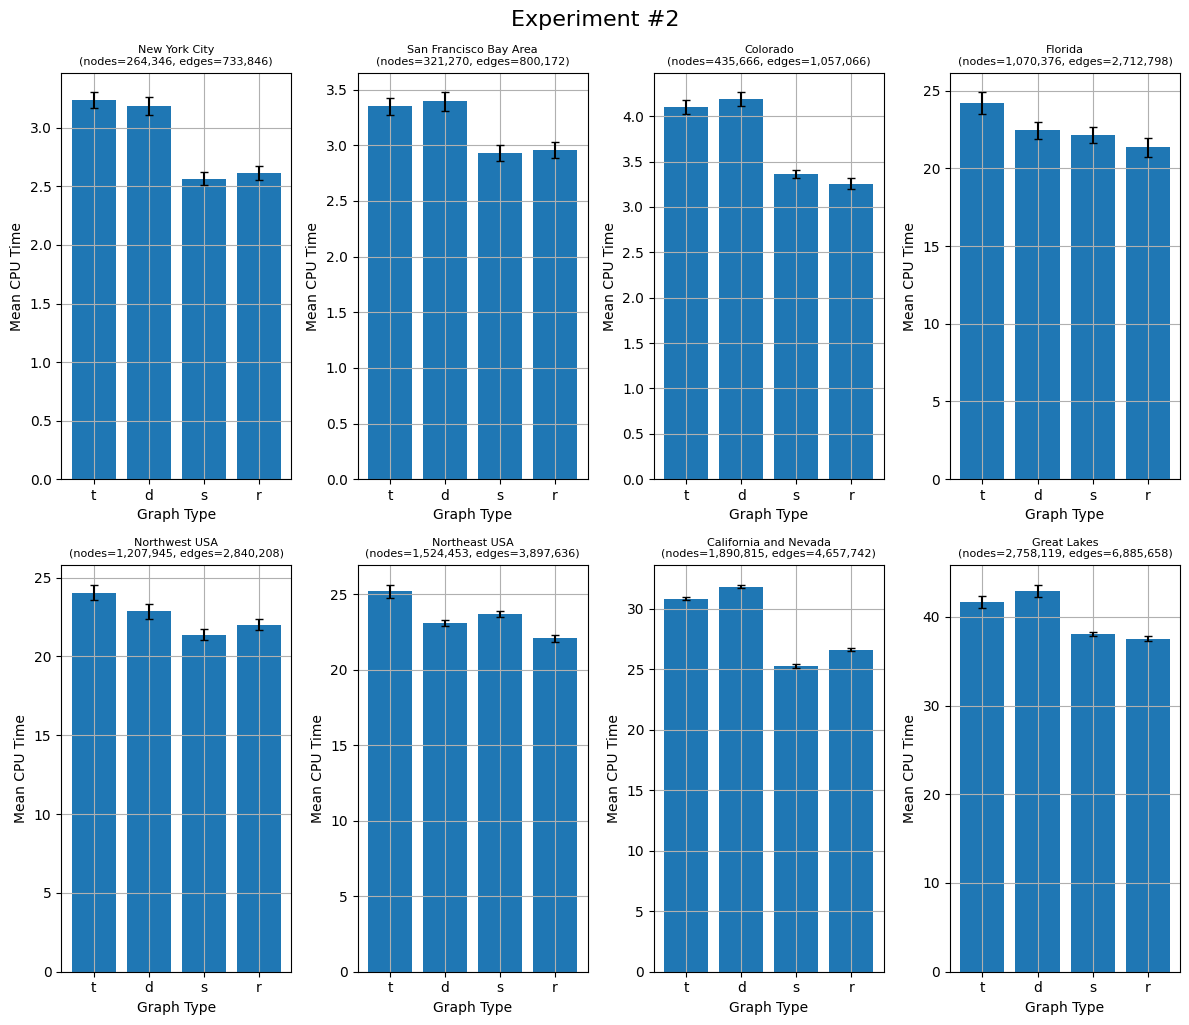

In [421]:
num_graphs = len(GRAPHS)
cols = 4
rows = math.ceil(num_graphs / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

sorted_graphs = sorted(GRAPHS.items(), key=lambda g: g[1].nodes_count)

for idx, (name, graph_data) in enumerate(sorted_graphs):
    ax = axes[idx]
    x = [d.graph_type.value[:1] for d in graph_data.experiment]
    y = [d.mean for d in graph_data.experiment]
    yerr = [d.confidence_interval for d in graph_data.experiment]

    T_TIME.append(y[0])
    D_TIME.append(y[1])
    S_TIME.append(y[2])
    R_TIME.append(y[3])

    ax.bar(x, y, yerr=yerr, capsize=3, label=name, color='tab:blue')
    ax.set_title(f"{name}\n(nodes={graph_data.nodes_count:,}, edges={graph_data.edges_count:,})", fontsize=8)
    ax.set_xlabel("Graph Type")
    ax.set_ylabel("Mean CPU Time")
    ax.grid(True)

plt.tight_layout()
plt.suptitle("Experiment #2", fontsize=16, y=1.02)
plt.show()

Гипотеза: нет никакой статистически значимой разницы между графом с распределением весов X и распределением Y. Надо проверить это на всём датасете.

In [422]:
# Paired t-test is a method used to test whether the mean difference between pairs of measurements is zero or not.

tests = [
    ("Distance-Time", ttest_rel(T_TIME, D_TIME)),
    ("Distance-Shuffled", ttest_rel(D_TIME, S_TIME)),
    ("Distance-Random", ttest_rel(D_TIME, R_TIME)),
    ("Time-Random", ttest_rel(T_TIME, R_TIME)),
    ("Time-Shuffled", ttest_rel(T_TIME, S_TIME)),
    ("Shuffled-Random", ttest_rel(S_TIME, R_TIME))
]

# p_value -- number describing the likelihood of obtaining the observed data under the null hypothesis of a statistical test
# (Smaller p-value means stronger evidence in favor of the alternative hypothesis)
# (Decision rule: p < alpha => Reject H0)

# t_statistics -- how many standard errors the observed mean difference is away from the null hypothesis value (0).
# (If the t-statistic is close to 0, the mean difference is small -> the null hypothesis looks plausible)
# (Positive t_stat → Group A is typically slower than Group B (if D = A - B))
# (Negative t_stat → Group A is faster)

# Number of comparisons
num_tests = len(tests)
bonferroni_threshold = 0.05 / num_tests

print(f"Bonferroni corrected significance threshold: {bonferroni_threshold:.6f}\n")

for name, (t_stat, p_value) in tests:
    print(f"T-stat: {t_stat:.5f}, P-value: {p_value:.5f}, Reject: {p_value < 0.05}, Corrected Reject: {p_value < bonferroni_threshold}, ({name})")

Bonferroni corrected significance threshold: 0.008333

T-stat: 0.78381, P-value: 0.45885, Reject: False, Corrected Reject: False, (Distance-Time)
T-stat: 2.03601, P-value: 0.08119, Reject: False, Corrected Reject: False, (Distance-Shuffled)
T-stat: 2.62394, P-value: 0.03421, Reject: True, Corrected Reject: False, (Distance-Random)
T-stat: 4.17806, P-value: 0.00415, Reject: True, Corrected Reject: True, (Time-Random)
T-stat: 3.45361, P-value: 0.01064, Reject: True, Corrected Reject: False, (Time-Shuffled)
T-stat: 0.37063, P-value: 0.72187, Reject: False, Corrected Reject: False, (Shuffled-Random)
